In [1]:
import pandas as pd
import matplotlib.pyplot as plt

N=900000
N_TEST=100000
BlockCount=[10000]
BlockCount_TEST=[20000]
NN_est=[100, 200, 300, 400]
NN_pred=[200, 400, 600]
DIM=10

DIR = '../log/RealDataset'

rmspe_array = []
params_array = []
# Read the CSV file
for i in range(len(BlockCount)):
    for j in range(len(NN_est)):
        df_array = pd.read_csv(f'{DIR}/logFile_numPointsTotal{N}_numBlocksTotal{BlockCount[i]}_m{NN_est[j]}_seed1_isScaled1_RealDataset.csv')
        theta_array = pd.read_csv(f'{DIR}/theta_numPointsTotal{N}_numBlocksTotal{BlockCount[i]}_m{NN_est[j]}_seed1_isScaled1_RealDataset.csv')
        rmspe_array.append(df_array['rmspe'].values)
        params_array.append(theta_array.iloc[0, 2:12].values)

print(rmspe_array)
print(params_array)

[array([4.2876014 , 3.42859265, 3.34495894]), array([2.8430152 , 2.65584051, 2.61136435]), array([2.799167  , 2.62612818, 2.58392657]), array([2.62940278, 2.38510915, 2.33100171])]
[array([0.32723  , 0.0707008, 0.54316  , 0.248194 , 0.894156 , 0.476546 ,
       0.141488 , 1.45502  , 1.47608  , 0.253129 ]), array([ 0.348476 ,  0.0867902,  0.827594 ,  0.322163 ,  1.62763  ,
        0.624776 ,  0.117526 , 14.5502   , 14.7608   ,  0.345515 ]), array([3.67714e-01, 9.25074e-02, 8.16520e-01, 3.34104e-01, 1.74761e+00,
       6.52872e-01, 1.20466e-01, 3.42677e+01, 1.47608e+02, 3.75236e-01]), array([4.07713e-01, 1.00424e-01, 9.58693e-01, 3.63350e-01, 1.98254e+00,
       7.24784e-01, 3.86602e-02, 3.97762e+01, 1.47608e+03, 4.14771e-01])]


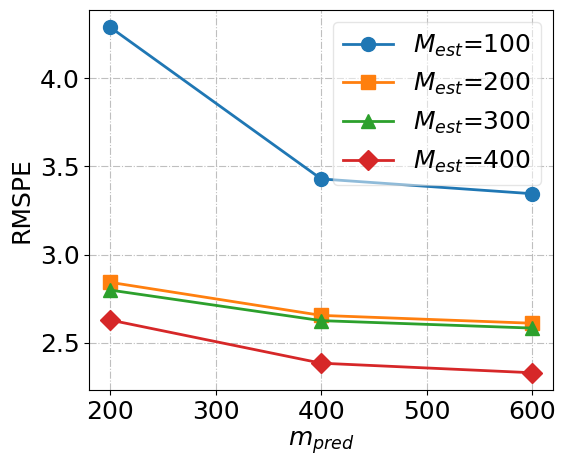

In [2]:
import matplotlib.pyplot as plt 

# Set default font size
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(6, 5))

# Different styles for each line
styles = {
    'colors': ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],  # More distinct colors
    'markers': ['o', 's', '^', 'D'],  # Circle, Square, Triangle, Diamond
    'linestyles': ['-', '--', '-.', ':']  # Solid, Dashed, Dashdot, Dotted
}

for i, nn_est in enumerate(NN_est):
    plt.plot(NN_pred, rmspe_array[i], 
             marker=styles['markers'][i],
            #  linestyle=styles['linestyles'][i],
             color=styles['colors'][i],
             label=r'$M_{est}$='+str(nn_est),
             markersize=10,
             linewidth=2)

plt.xlabel(r'$m_{pred}$')
plt.ylabel('RMSPE')
# plt.title('RMSPE vs NN_pred for different NN_est values')
plt.legend(framealpha=0.5)
plt.grid(True, ls="-.", alpha=0.8)
plt.tight_layout()
plt.savefig('./fig/real_dataset_1M_rmspe.pdf')
plt.show()

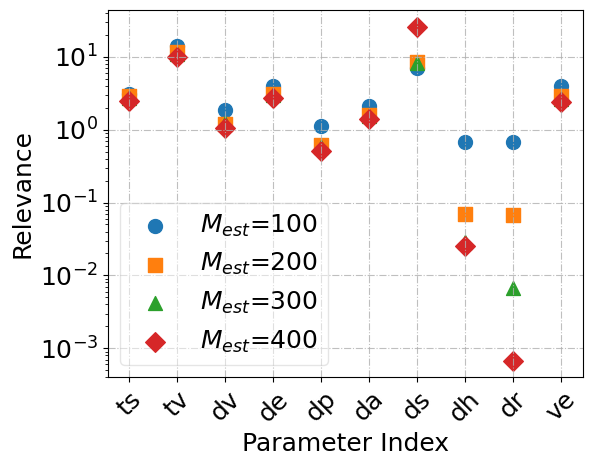

In [4]:
import matplotlib.pyplot as plt 

plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(6, 5))

# Different styles for each line
styles = {
    'colors': ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],  # More distinct colors
    'markers': ['o', 's', '^', 'D'],  # Circle, Square, Triangle, Diamond
}

# Parameter names
param_names = ['ts', 'tv', 'dv', 'de', 'dp', 'da', 'ds', 'dh', 'dr', 've']
x_values = range(1, 11)

# Plot each theta array
for i, nn_est in enumerate(NN_est):
    plt.scatter(x_values, 1/params_array[i], 
               marker=styles['markers'][i],
               color=styles['colors'][i],
               label=r'$M_{est}$='+str(nn_est),
               s=100)

plt.xticks(x_values, param_names, rotation=45)  # Add parameter names to x-axis
plt.xlabel('Parameter Index')
plt.ylabel('Relevance')
plt.legend(framealpha=0.5)
plt.grid(True, ls="-.", alpha=0.8)
plt.tight_layout()
plt.yscale('log')
plt.savefig('./fig/real_dataset_1M_params.pdf')
plt.show()